# ✏️ Loading the Dataset and Understanding the Variables!
---

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [67]:
file_name = "conflict_data.csv"

In [69]:
try:
    conflict_data = pd.read_csv(file_name)
    print("🎉 Dataset loaded successfully!")
except FileNotFoundError:
    print(f"🚫 Could not find the file at {file_name}. Please verify the path.")
except Exception as exc:
    print(f"⚠️ An error occurred during dataset loading: {exc}")

🎉 Dataset loaded successfully!


In [71]:
# Show the first few rows of the dataset
print("🔍 Overview of the First 5 Rows:")
display(conflict_data.head())

🔍 Overview of the First 5 Rows:


,Entity,Year,One-sided violence,Non-state,Intrastate,Extrasystemic,Interstate
0,Africa,1989,3598,2507,34907,0,0
1,Africa,1990,6574,1373,64839,0,0
2,Africa,1991,5754,2707,25480,0,0
3,Africa,1992,4087,7460,6887,0,0
4,Africa,1993,11851,13985,15064,0,0


### 1. Entity
This variable specifies the geographical region of the conflict. The region can be a country, a city, or a larger geographical area. This information helps pinpoint the exact location where the conflict occurred. The geographical region data allows us to analyze the regional distribution of conflicts, helping us identify which areas are more prone to conflicts and how the people in those regions are affected. Such information is crucial for targeting conflict prevention and peacebuilding efforts.

### 2. Year
The Year variable indicates the year in which the conflict occurred. As a time-series data, it allows us to analyze how conflicts evolve over time. Time-related data helps us examine historical trends of conflicts and the periods during which intense conflict events took place. Understanding these patterns helps us investigate the causes, outcomes, and long-term effects of conflicts.

### 3. One-sided violence
This variable represents the number of deaths resulting from one-sided violence, which typically involves attacks against civilians by armed groups or states. Data on one-sided violence provides critical insights into the protection of civilians and human rights violations. This information is vital for human rights organizations and international bodies focused on peace and security.

### 4. Non-state
The Non-state variable indicates the number of deaths resulting from conflicts between non-state actors, such as armed groups, militias, or terrorist organizations. Analyzing conflicts between non-state actors helps us understand security threats that are outside state control and how to address these challenges. This data is important for shaping national and international security strategies.

### 5. Intrastate
This variable refers to the deaths occurring in internal conflicts within a country. Internal conflicts may include wars between government forces and insurgents, or between ethnic or political groups. Analyzing internal conflicts provides valuable insights into a country's stability and the internal dynamics that influence societal well-being. This data is critical for peacebuilding, national reconciliation, and fostering long-term stability.

### 6. Extrasystemic
The Extrasystemic variable refers to deaths occurring in conflicts between states and their colonies or dependent regions. Extrasystemic conflicts often involve colonial wars and struggles for independence. Understanding these conflicts helps us examine the historical impacts of colonialism and the struggles for independence. This data is significant for historical justice and the post-conflict reconstruction of formerly colonized regions.

### 7. Interstate
Finally, the Interstate variable refers to deaths that occur in conflicts between states. Interstate conflicts typically involve wars between two or more countries. The analysis of interstate conflicts is crucial for understanding international relations, diplomacy, and global security policies. This data helps inform international peace agreements and strategies aimed at preventing wars.

# 🌟 Exploring the Characteristics of Our Conflict Dataset
---

In [75]:
# Display information about dataset columns
print("📊 Dataset Columns and Their Data Types:")
conflict_data.info()

📊 Dataset Columns and Their Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entity              210 non-null    object
 1   Year                210 non-null    int64 
 2   One-sided violence  210 non-null    int64 
 3   Non-state           210 non-null    int64 
 4   Intrastate          210 non-null    int64 
 5   Extrasystemic       210 non-null    int64 
 6   Interstate          210 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.6+ KB


In [77]:
# Display summary statistics of the dataset
print("🔢 Descriptive Statistics:")
display(conflict_data.describe())

🔢 Descriptive Statistics:


,Year,One-sided violence,Non-state,Intrastate,Extrasystemic,Interstate
count,210.000000,210.000000,210.000000,210.000000,210.0,210.000000
mean,2006.000000,11103.104762,3555.609524,18364.761905,0.0,2843.828571
std,10.123638,75756.265585,5660.328309,30714.842452,0.0,13096.780925
min,1989.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1997.000000,257.000000,128.500000,1397.250000,0.0,0.000000
50%,2006.000000,1162.500000,833.500000,7230.500000,0.0,0.000000
75%,2015.000000,5061.750000,4345.000000,21071.500000,0.0,61.250000
max,2023.000000,779683.000000,30894.000000,199568.000000,0.0,91929.000000


In [79]:
# Identify any missing values in the dataset
print("🔍 Missing Data Check:")
missing_values = conflict_data.isnull().sum()
display(missing_values[missing_values > 0])

🔍 Missing Data Check:


Series([], dtype: int64)

In [81]:
# Identify and display unique values in categorical columns
print("📋 Unique Values Summary for Categorical Columns:")
categorical_columns = conflict_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    unique_values = conflict_data[col].unique()
    unique_count = len(unique_values)
    print(f"- {col}: {unique_count} unique values")
    print(f"  Values: {unique_values}\n")

📋 Unique Values Summary for Categorical Columns:
- Entity: 6 unique values
  Values: ['Africa' 'Americas' 'Asia and Oceania' 'Europe' 'Middle East' 'World']



In [83]:
# Update column names for enhanced clarity and readability
new_column_names = { 'Entity': 'Region', 
                    'Year': 'Conflict_Year', 
                    'One-sided violence': 'One_Sided_Violence_Deaths', 
                    'Non-state': 'Non_State_Actor_Violence', 
                    'Intrastate': 'Intrastate_Conflict_Deaths', 
                    'Extrasystemic': 'Colonial_Conflict_Deaths', 
                    'Interstate': 'Interstate_War_Deaths' }

In [85]:
conflict_data.rename(columns=new_column_names, inplace=True)

In [87]:
display(conflict_data.head())

,Region,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Colonial_Conflict_Deaths,Interstate_War_Deaths
0,Africa,1989,3598,2507,34907,0,0
1,Africa,1990,6574,1373,64839,0,0
2,Africa,1991,5754,2707,25480,0,0
3,Africa,1992,4087,7460,6887,0,0
4,Africa,1993,11851,13985,15064,0,0


In [89]:
# Standardize text case for all categorical columns to lowercase
categorical_columns = conflict_data.select_dtypes(include=['object']).columns
conflict_data[categorical_columns] = conflict_data[categorical_columns].apply(lambda x: x.str.lower() if x.dtype == "object" else x)
print("🔄 Categorical columns text standardized to lowercase.")

🔄 Categorical columns text standardized to lowercase.


In [91]:
display(conflict_data.head())

,Region,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Colonial_Conflict_Deaths,Interstate_War_Deaths
0,africa,1989,3598,2507,34907,0,0
1,africa,1990,6574,1373,64839,0,0
2,africa,1991,5754,2707,25480,0,0
3,africa,1992,4087,7460,6887,0,0
4,africa,1993,11851,13985,15064,0,0


In [93]:
import time

# Inspect numerical column ranges for anomalies and report findings
print("🔍 Checking numerical column ranges for anomalies:")
numerical_columns = conflict_data.select_dtypes(include=['int', 'float']).columns

# Using DataFrame aggregation for a cleaner approach
range_summary = conflict_data[numerical_columns].agg(['min', 'max']).transpose()

for col, row in range_summary.iterrows():
    print(f"- '{col}': Min = {row['min']}, Max = {row['max']}")
    time.sleep(1)
print("✅ Numerical column range check complete.")

🔍 Checking numerical column ranges for anomalies:
- 'Conflict_Year': Min = 1989, Max = 2023
- 'One_Sided_Violence_Deaths': Min = 0, Max = 779683
- 'Non_State_Actor_Violence': Min = 0, Max = 30894
- 'Intrastate_Conflict_Deaths': Min = 0, Max = 199568
- 'Colonial_Conflict_Deaths': Min = 0, Max = 0
- 'Interstate_War_Deaths': Min = 0, Max = 91929
✅ Numerical column range check complete.


In [94]:
# Remove the 'Colonial_Conflict_Deaths' column from the dataset
conflict_data.drop(columns=['Colonial_Conflict_Deaths'], inplace=True)
print("🗑️ 'Extrasystemic violence' column has been removed from the dataset.")

🗑️ 'Extrasystemic violence' column has been removed from the dataset.


In [95]:
display(conflict_data.head())

,Region,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths
0,africa,1989,3598,2507,34907,0
1,africa,1990,6574,1373,64839,0
2,africa,1991,5754,2707,25480,0
3,africa,1992,4087,7460,6887,0
4,africa,1993,11851,13985,15064,0


In [96]:
# Identify and correct negative values in columns
death_columns = ["Conflict_Year", "One_Sided_Violence_Deaths", "Non_State_Actor_Violence", "Intrastate_Conflict_Deaths", "Interstate_War_Deaths"]

for col in death_columns:
    negative_values = conflict_data[col] < 0
    if negative_values.any():
        print(f"❌ Negative values found in '{col}'.")
        
        # Replace negative values with 0
        conflict_data.loc[negative_values, col] = 0
        print(f"✅ Negative values in '{col}' have been replaced with 0.")
        time.sleep(1)
    else:
        print(f"✅ No negative values found in '{col}'.")
        time.sleep(1)

✅ No negative values found in 'Conflict_Year'.
✅ No negative values found in 'One_Sided_Violence_Deaths'.
✅ No negative values found in 'Non_State_Actor_Violence'.
✅ No negative values found in 'Intrastate_Conflict_Deaths'.
✅ No negative values found in 'Interstate_War_Deaths'.


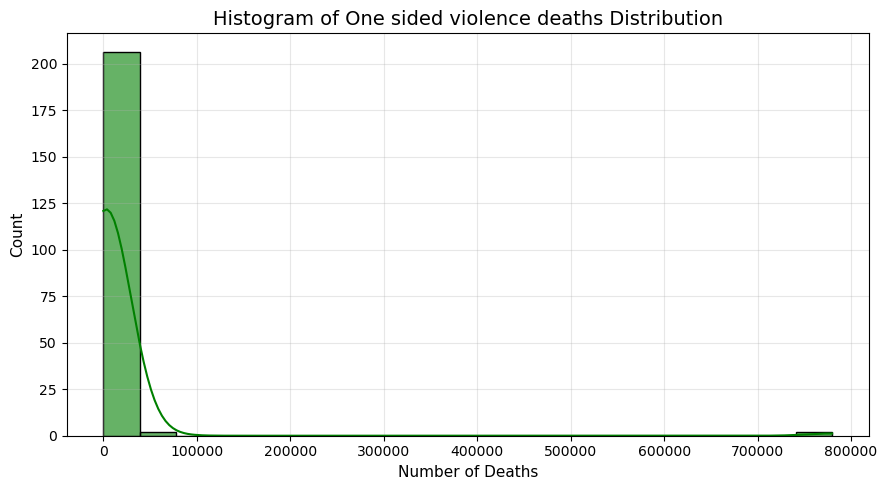

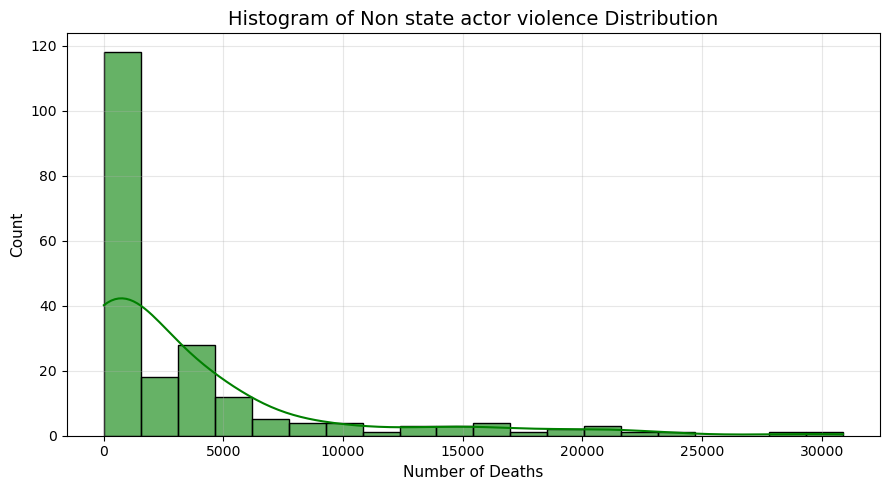

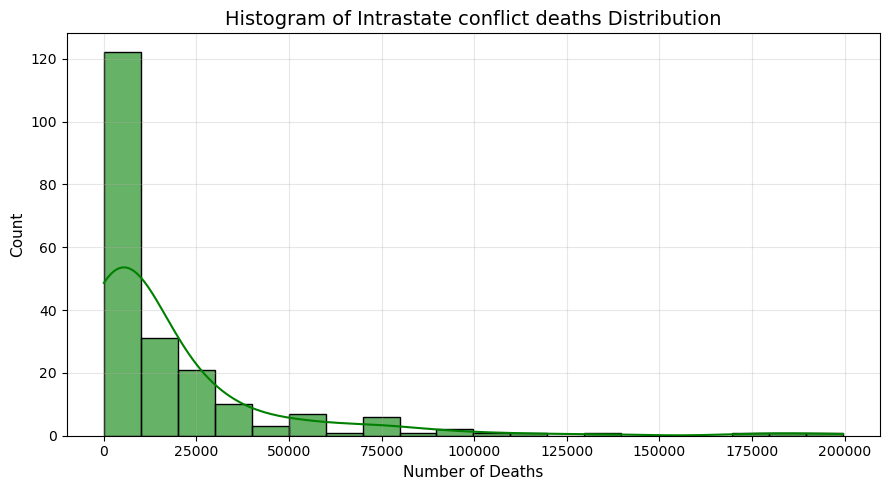

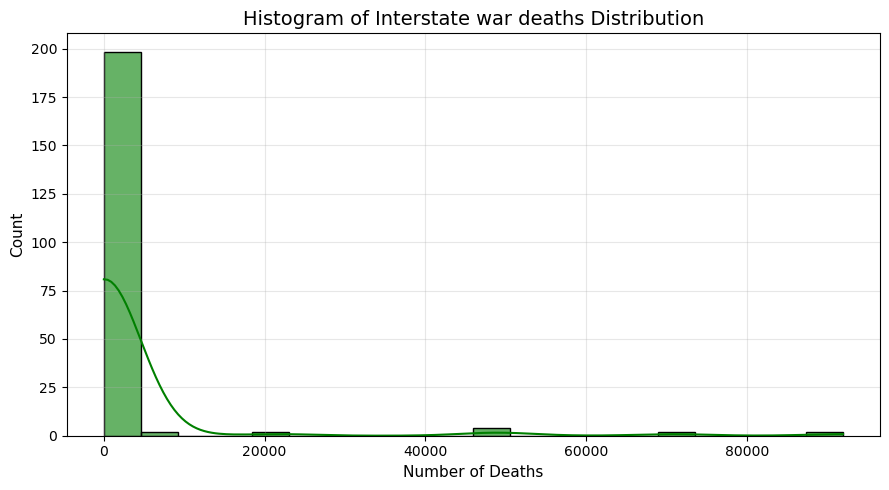

In [97]:
# Visualize the distribution of death-related columns using histograms
death_columns = ["One_Sided_Violence_Deaths", "Non_State_Actor_Violence", "Intrastate_Conflict_Deaths", "Interstate_War_Deaths"]

# Loop through each column and plot a histogram
for column in death_columns:
    plt.figure(figsize=(9, 5))
    sns.histplot(data=conflict_data, x=column, kde=True, bins=20, color='green', alpha=0.6)
    plt.title(f"Histogram of {column.replace('_', ' ').capitalize()} Distribution", fontsize=14)
    plt.xlabel("Number of Deaths", fontsize=11)
    plt.ylabel("Count", fontsize=11)
    plt.grid(visible=True, linestyle='-', alpha=0.3)
    plt.tight_layout()  # Adjust the layout to prevent clipping of ylabel
    plt.show()


# 📊 Exploring Annual Trends
---

In [104]:
# Summarize death counts annually
annual_deaths = conflict_data.groupby("Conflict_Year")[death_columns].sum().reset_index()

annual_deaths

,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths
0,1989,15984,8340,108632,1736
1,1990,19726,10502,158422,2172
2,1991,19478,7720,96898,43778
3,1992,23406,20916,106718,50
4,1993,28210,29446,89894,0
5,1994,1559366,10598,76898,84
6,1995,42180,8938,73278,198
7,1996,108596,8392,57532,182
8,1997,42476,8612,82008,254
9,1998,34716,7046,78142,2294


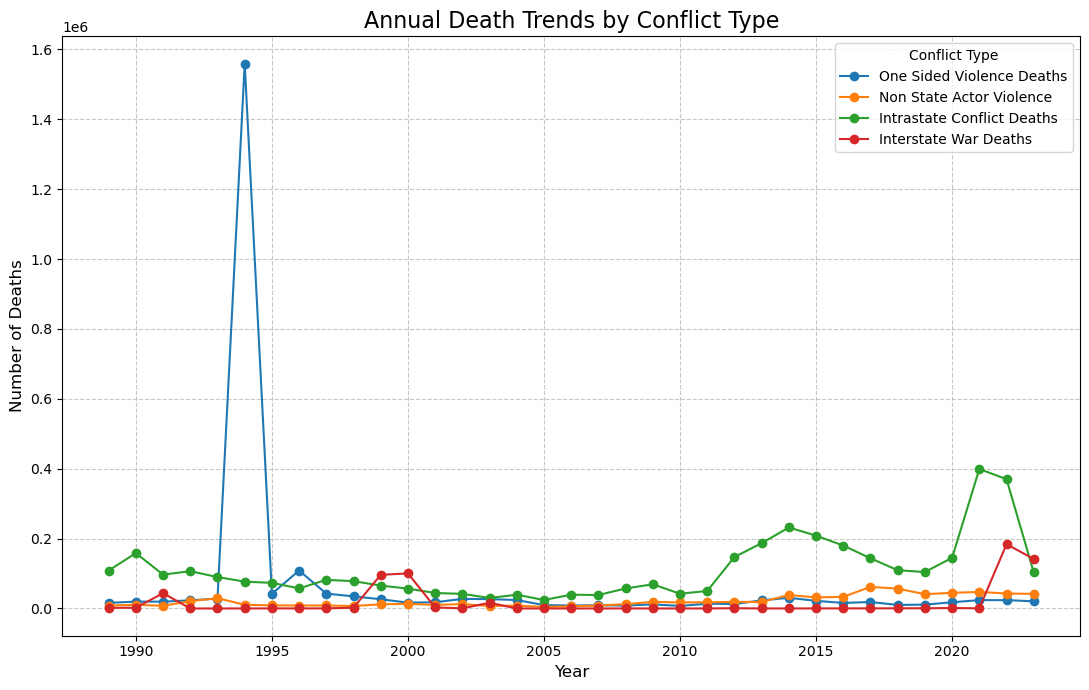

In [106]:
# Visualize yearly trends for each type of conflict
plt.figure(figsize=(11, 7))
for column in death_columns:
    plt.plot(annual_deaths["Conflict_Year"], annual_deaths[column], marker='o', label=column.replace('_', ' ').title())

plt.title("Annual Death Trends by Conflict Type", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Deaths", fontsize=12)
plt.legend(title="Conflict Type")
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

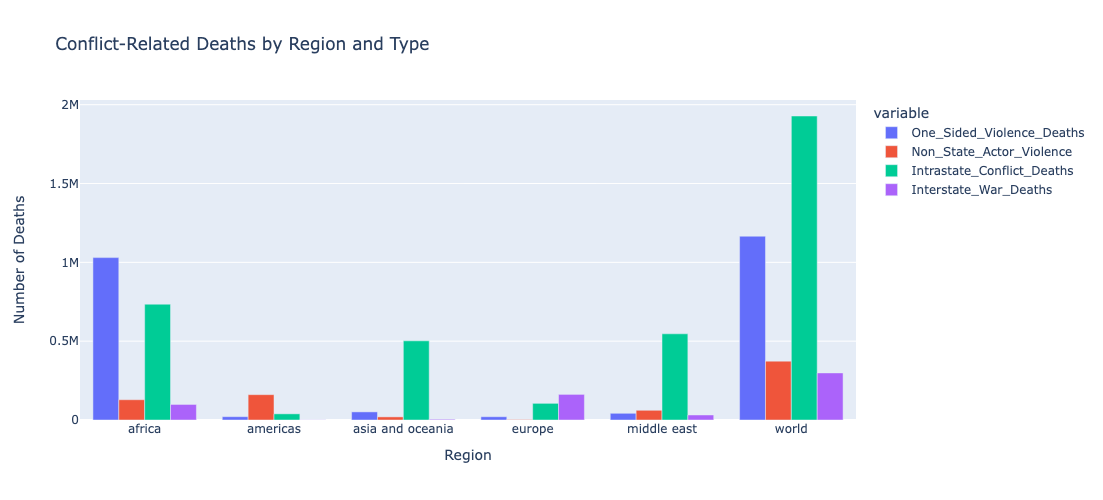

In [108]:
import plotly.express as px

# Aggregate data by region
region_wise_deaths = conflict_data.groupby("Region")[death_columns].sum().reset_index()

# Create an interactive bar plot using Plotly and adjust the size
fig = px.bar(region_wise_deaths,
             x="Region",
             y=death_columns,
             title="Conflict-Related Deaths by Region and Type",
             labels={"value": "Number of Deaths", "Region": "Region"},
             barmode="group")


fig.update_layout(
    autosize=False,
    width=1100,  # Width
    height=500  # Height
)

fig.show()

# 🔥 Visualizing Conflict Data Correlations: Heatmap Analysis
---

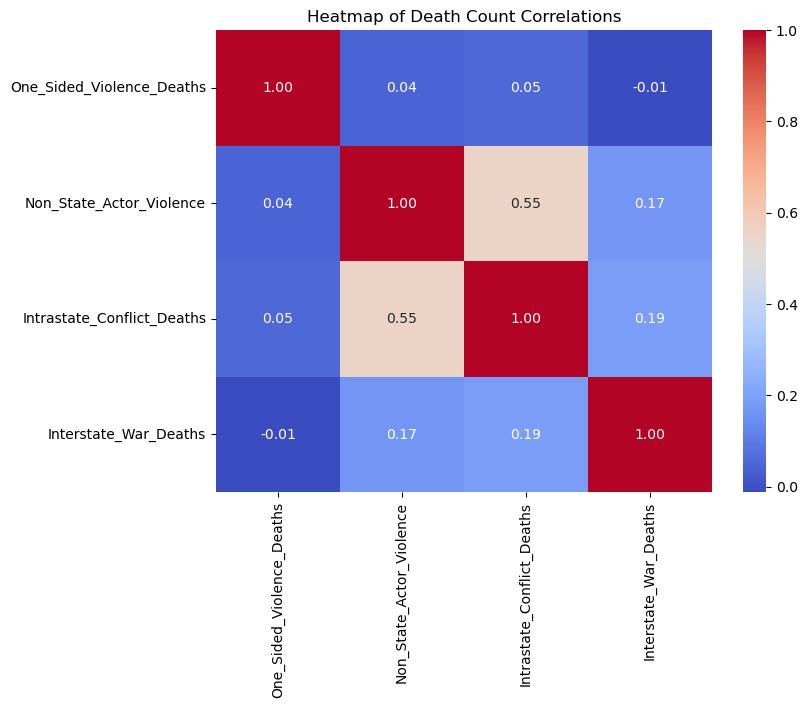

In [111]:
# Calculate the correlation matrix for the death count columns
corr_matrix = conflict_data[death_columns].corr()

# Create and display a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
heatmap.set_title("Heatmap of Death Count Correlations")
plt.show()


# 📊 Bar Charts for Regional Death Counts
---


⭐ Highest Death Counts in Top 5 Regions for One Sided Violence Deaths:
Region
africa              1029996
asia and oceania      51461
middle east           42576
americas              21090
europe                20703
Name: One_Sided_Violence_Deaths, dtype: int64


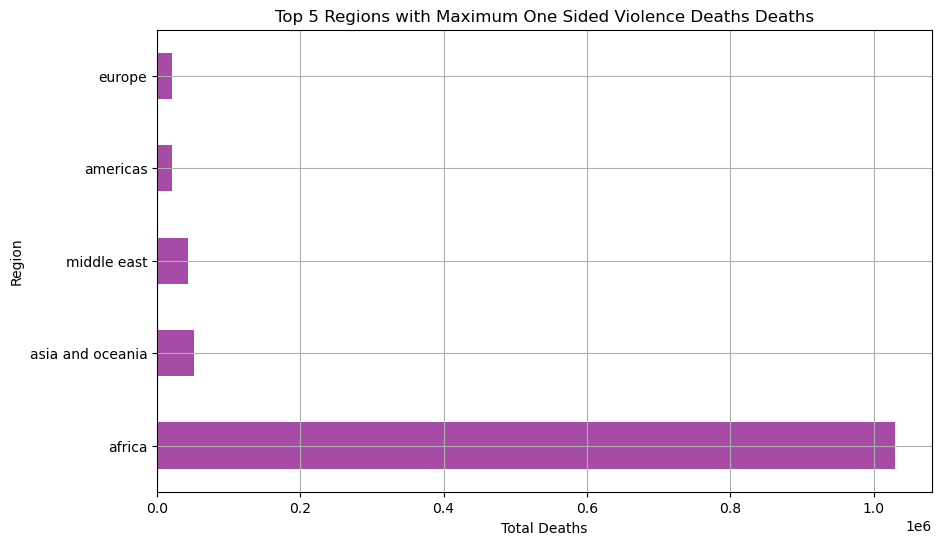


⭐ Highest Death Counts in Top 5 Regions for Non State Actor Violence:
Region
americas            160648
africa              128628
middle east          61643
asia and oceania     19709
europe                2711
Name: Non_State_Actor_Violence, dtype: int64


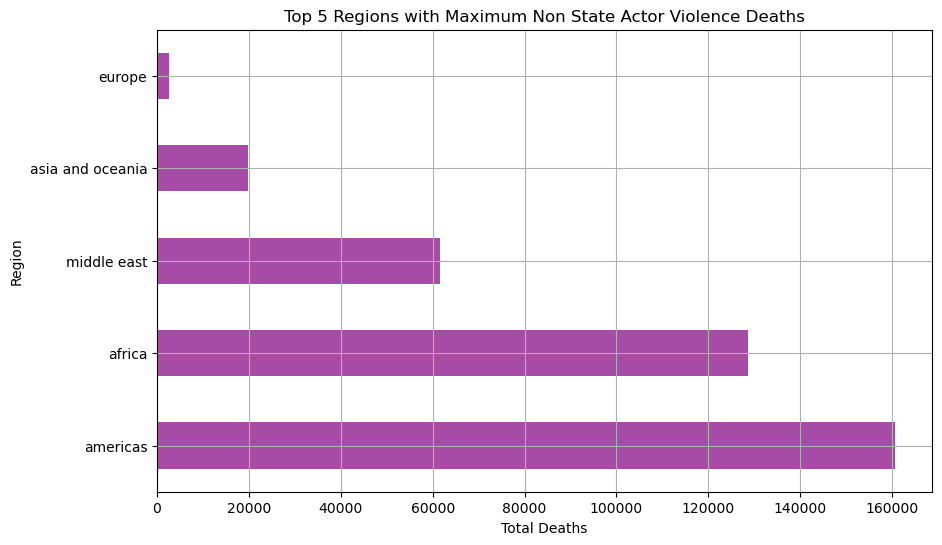


⭐ Highest Death Counts in Top 5 Regions for Intrastate Conflict Deaths:
Region
africa              734661
middle east         546721
asia and oceania    502144
europe              105691
americas             39083
Name: Intrastate_Conflict_Deaths, dtype: int64


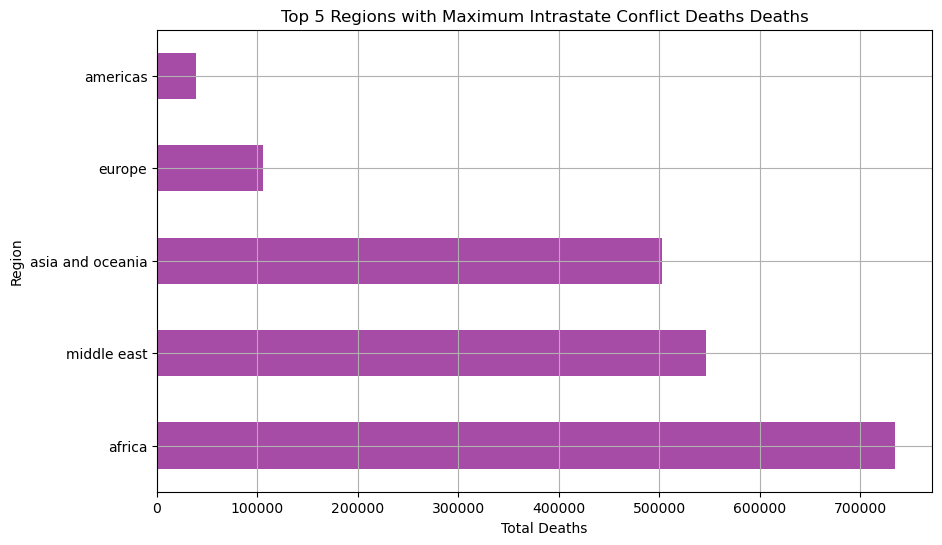


⭐ Highest Death Counts in Top 5 Regions for Interstate War Deaths:
Region
europe              162429
africa               98675
middle east          31865
asia and oceania      4691
americas               942
Name: Interstate_War_Deaths, dtype: int64


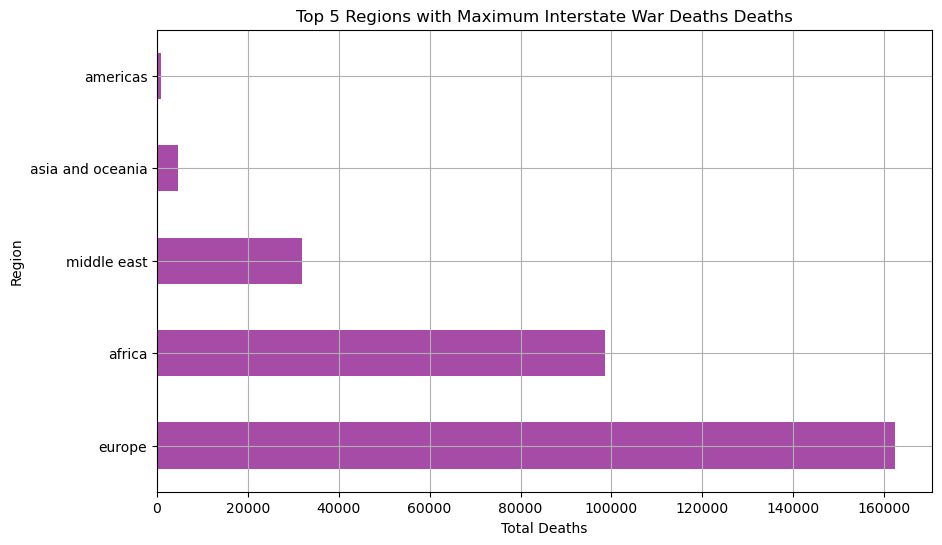

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# Determine the top 5 regions with the highest total deaths for each conflict type
for column in death_columns:
    # Filter out the 'World' region
    filtered_data = conflict_data[conflict_data["Region"] != "world"]
    highest_deaths_regions = filtered_data.groupby("Region")[column].sum().sort_values(ascending=False)
    print(f"\n⭐ Highest Death Counts in Top 5 Regions for {column.replace('_', ' ').title()}:")
    print(highest_deaths_regions)

    # Generate a horizontal bar chart for visualization
    plt.figure(figsize=(10, 6))
    highest_deaths_regions.plot(kind='barh', color='purple', alpha=0.7)
    plt.title(f"Top 5 Regions with Maximum {column.replace('_', ' ').title()} Deaths")
    plt.xlabel("Total Deaths")
    plt.ylabel("Region")
    plt.grid(True)
    plt.show()    

In [116]:
# Find the top 5 events with the maximum total deaths
conflict_data["total_deaths"] = conflict_data[death_columns].apply(lambda row: row.sum(), axis=1)
top_five_conflicts = conflict_data.sort_values(by="total_deaths", ascending=False).head(5)

# Display the top 5 results
print("🔥 Highest Total Death Counts in Top 5 Events:")
top_five_conflicts

🔥 Highest Total Death Counts in Top 5 Events:


,Region,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,total_deaths
180,world,1994,779683,5299,38449,42,823473
5,africa,1994,778178,3869,9605,0,791652
208,world,2022,11941,21430,185007,91929,310307
207,world,2021,11935,23663,199568,222,235388
33,africa,2022,8546,4461,175197,0,188204


# 📊 Visual Data Analysis: Stacked Bar Charts for Conflict-related Deaths Over the Years
---

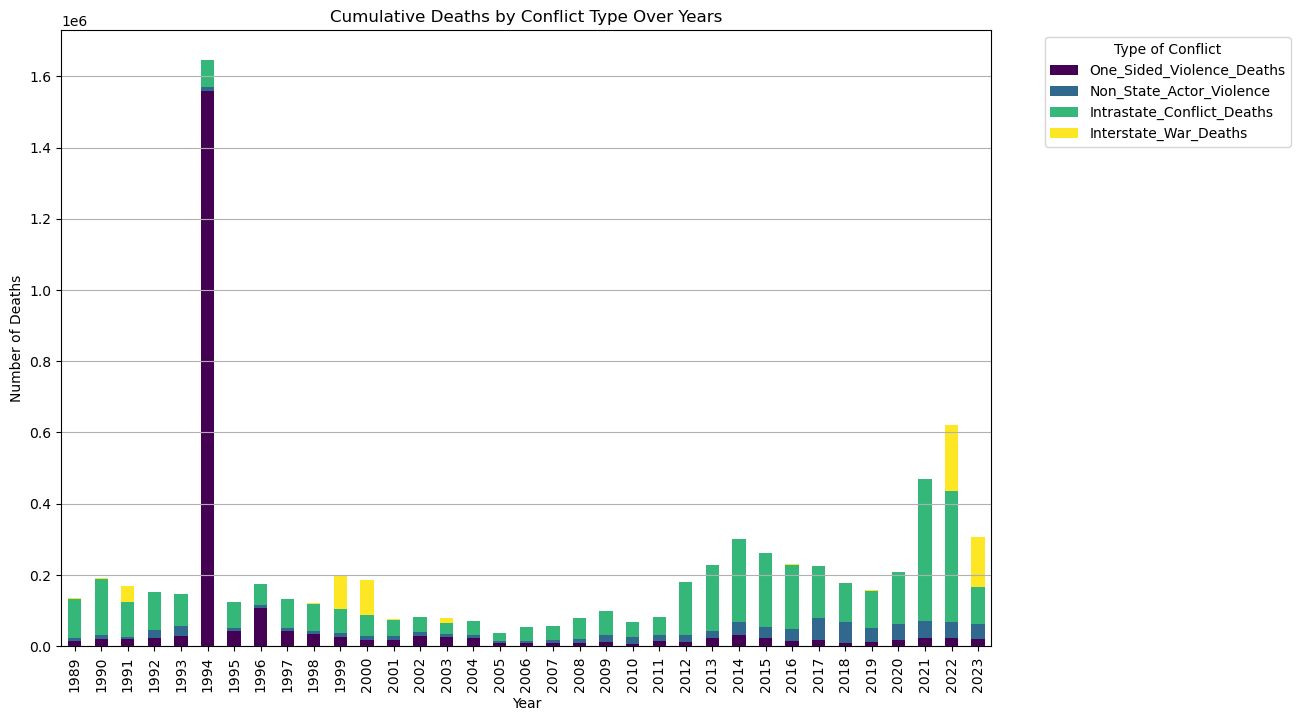

In [119]:
# Prepare data for visualization of cumulative deaths
prepared_data = conflict_data.groupby("Conflict_Year")[death_columns].sum().reset_index()

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
prepared_data.plot(
    x="Conflict_Year",
    kind="bar",
    stacked=True,
    colormap="viridis",
    ax=ax
)
ax.set_title("Cumulative Deaths by Conflict Type Over Years")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Deaths")
ax.legend(title="Type of Conflict", bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.grid(True)

plt.show()

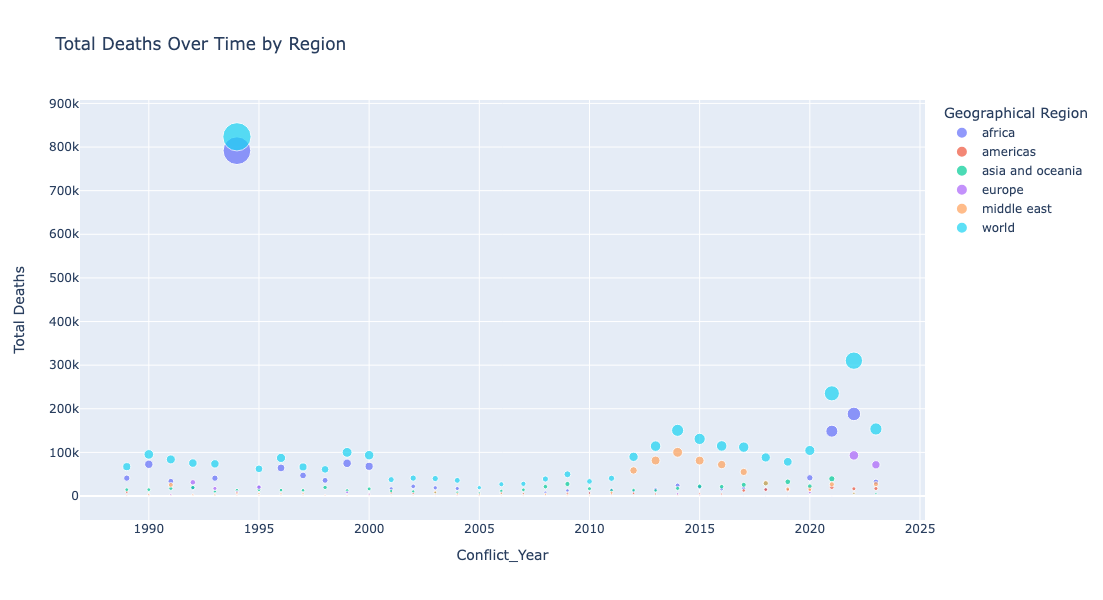

In [121]:
# Visualize total deaths over time with a bubble chart
visualization = px.scatter(
    conflict_data,
    x="Conflict_Year",
    y="total_deaths",
    size="total_deaths",
    color="Region",
    hover_data=death_columns,
    title="Total Deaths Over Time by Region",
    labels={"total_deaths": "Total Deaths", "Region": "Geographical Region"}
)



# Update layout to adjust figure size
visualization.update_layout(
    width=1000,
    height=600
)



visualization.show()

# 📊 Filtering and Visualizing Regional Death Trends: A Temporal Analysis
---

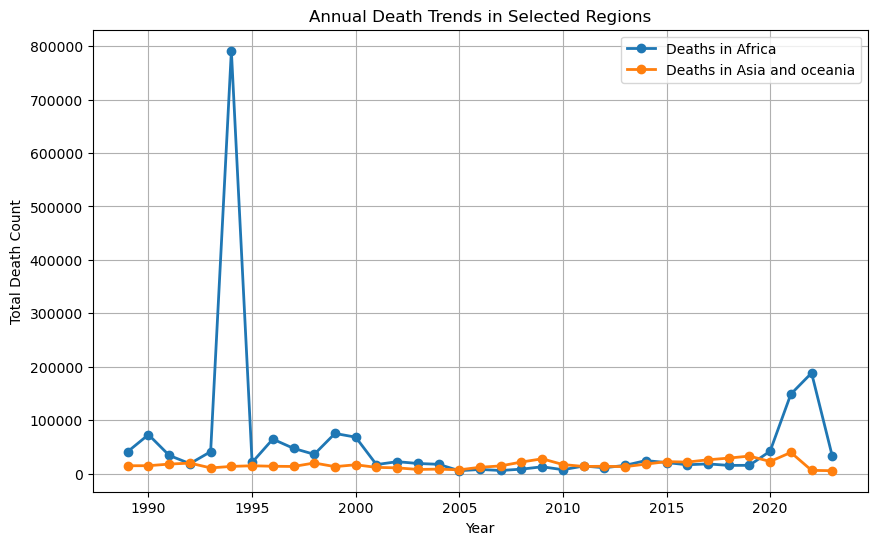

In [124]:
# Extract data for specified regions
chosen_regions = ["africa", "asia and oceania"]
data_for_regions = conflict_data[conflict_data["Region"].isin(chosen_regions)]

# Plot the annual death trends for chosen regions
if not data_for_regions.empty:
    plt.figure(figsize=(10, 6))
    for region in chosen_regions:
        annual_death_trend = (
            data_for_regions[data_for_regions["Region"] == region]
            .groupby("Conflict_Year")["total_deaths"]
            .sum()
        )
        plt.plot(
            annual_death_trend.index,
            annual_death_trend.values,
            marker="o",
            linestyle="-",
            linewidth=2,
            label=f"Deaths in {region.capitalize()}"
        )

    plt.title("Annual Death Trends in Selected Regions")
    plt.xlabel("Year")
    plt.ylabel("Total Death Count")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("⚠️ No data available for the specified regions.")

# 🔍 Optimal Cluster Analysis: Mastering Elbow Method and Silhouette Scores 📊
---

In [37]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

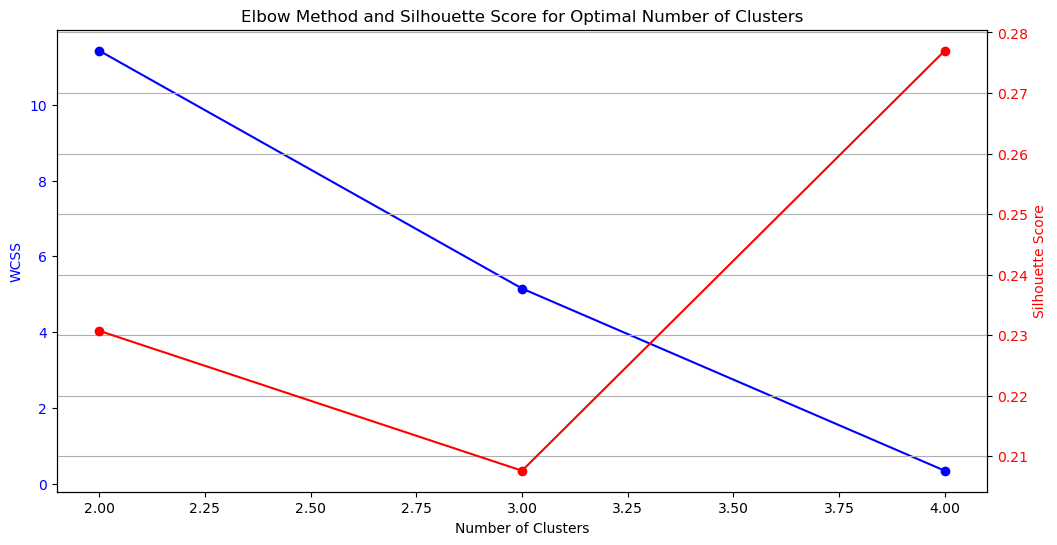

In [38]:
# Select relevant numerical columns for clustering, excluding "world"
clustering_data = conflict_data[conflict_data["Region"] != "world"].groupby("Region")[death_columns].sum()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


max_clusters = min(10, len(clustering_data) - 1)

# Calculate WCSS and Silhouette Scores for different number of clusters
wcss = []
silhouette_scores = []

for i in range(2, max_clusters + 1):  
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# Plot the Elbow Method and Silhouette Scores
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('WCSS', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='r')
ax2.set_ylabel('Silhouette Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Elbow Method and Silhouette Score for Optimal Number of Clusters')
plt.grid(True)
plt.show()

📊 Regional Conflict Clustering: Standardization & Visualization 🌍
---

In [40]:
# Perform K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clustering_data["Cluster"] = kmeans.fit_predict(scaled_data)

In [41]:
clustering_data

,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,Cluster
Region,,,,,
africa,1029996,128628,734661,98675,2
americas,21090,160648,39083,942,3
asia and oceania,51461,19709,502144,4691,1
europe,20703,2711,105691,162429,0
middle east,42576,61643,546721,31865,1


In [42]:
clustering_data.reset_index(inplace=True)

In [43]:
clustering_data

,Region,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,Cluster
0,africa,1029996,128628,734661,98675,2
1,americas,21090,160648,39083,942,3
2,asia and oceania,51461,19709,502144,4691,1
3,europe,20703,2711,105691,162429,0
4,middle east,42576,61643,546721,31865,1


In [44]:
conflict_data

,Region,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,total_deaths
0,africa,1989,3598,2507,34907,0,41012
1,africa,1990,6574,1373,64839,0,72786
2,africa,1991,5754,2707,25480,0,33941
3,africa,1992,4087,7460,6887,0,18434
4,africa,1993,11851,13985,15064,0,40900
...,...,...,...,...,...,...,...
205,world,2019,5536,20444,52173,302,78455
206,world,2020,8880,22401,72509,648,104438
207,world,2021,11935,23663,199568,222,235388
208,world,2022,11941,21430,185007,91929,310307


In [45]:
conflict_data = conflict_data.merge(clustering_data[["Region", "Cluster"]], on="Region")

In [46]:
conflict_data

,Region,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,total_deaths,Cluster
0,africa,1989,3598,2507,34907,0,41012,2
1,africa,1990,6574,1373,64839,0,72786,2
2,africa,1991,5754,2707,25480,0,33941,2
3,africa,1992,4087,7460,6887,0,18434,2
4,africa,1993,11851,13985,15064,0,40900,2
...,...,...,...,...,...,...,...,...
170,middle east,2019,596,3804,11770,138,16308,1
171,middle east,2020,226,1103,12492,461,14282,1
172,middle east,2021,299,364,26104,166,26933,1
173,middle east,2022,300,875,5187,55,6417,1


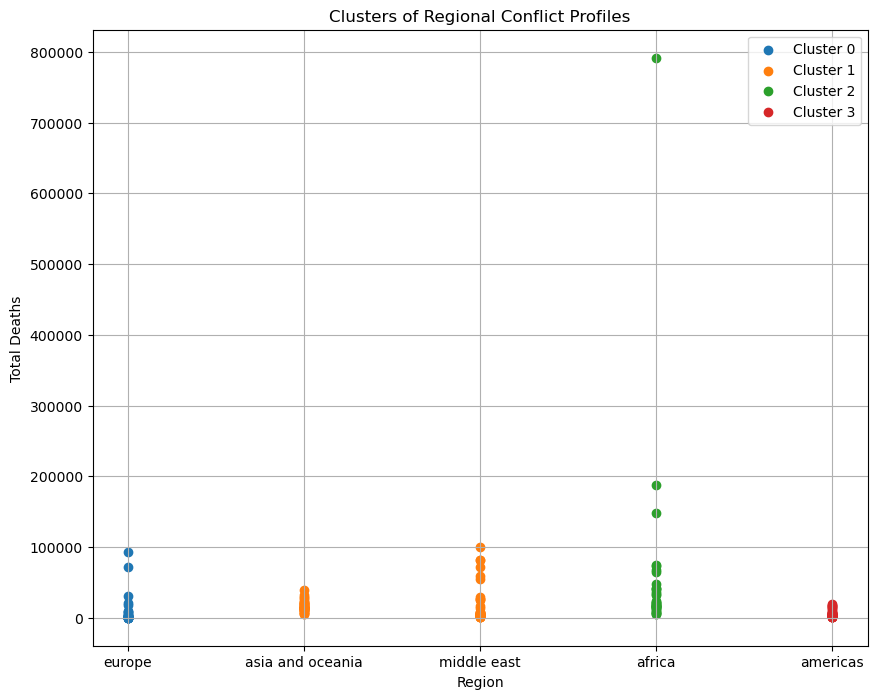

In [47]:
# Visualize Clusters with a Scatter Plot
plt.figure(figsize=(10, 8))
for cluster in range(4):  
    graph_cluster_data = conflict_data[conflict_data["Cluster"] == cluster]
    plt.scatter(
        graph_cluster_data["Region"],
        graph_cluster_data["total_deaths"],
        label=f"Cluster {cluster}"
    )

plt.title("Clusters of Regional Conflict Profiles")
plt.xlabel("Region")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.show()

In [48]:
clustering_data

,Region,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,Cluster
0,africa,1029996,128628,734661,98675,2
1,americas,21090,160648,39083,942,3
2,asia and oceania,51461,19709,502144,4691,1
3,europe,20703,2711,105691,162429,0
4,middle east,42576,61643,546721,31865,1


In [49]:
conflict_data.head()

,Region,Conflict_Year,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,total_deaths,Cluster
0,africa,1989,3598,2507,34907,0,41012,2
1,africa,1990,6574,1373,64839,0,72786,2
2,africa,1991,5754,2707,25480,0,33941,2
3,africa,1992,4087,7460,6887,0,18434,2
4,africa,1993,11851,13985,15064,0,40900,2


# 📊 Advanced Data Visualization with Plotly: Animating Conflict Trends Over Time 🌐📈
---

Please enter the appropriate number for the variable whose annual change you are curious about:
    
    "1": "One_Sided_Violence_Deaths",
    "2": "Non_State_Actor_Violence",
    "3": "Intrastate_Conflict_Deaths",
    "4": "Interstate_War_Deaths",
    "5": "total_deaths"

 1


🎥 Exploring Trends Across Regions and Years:


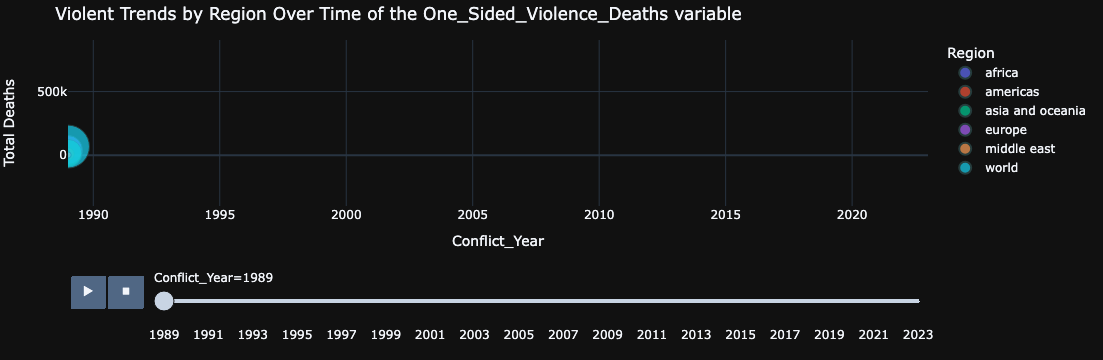

In [134]:
options = {
    "1": "One_Sided_Violence_Deaths",
    "2": "Non_State_Actor_Violence",
    "3": "Intrastate_Conflict_Deaths",
    "4": "Interstate_War_Deaths",
    "5": "total_deaths"
}

while True:
    question = input("""Please enter the appropriate number for the variable whose annual change you are curious about:
    
    "1": "One_Sided_Violence_Deaths",
    "2": "Non_State_Actor_Violence",
    "3": "Intrastate_Conflict_Deaths",
    "4": "Interstate_War_Deaths",
    "5": "total_deaths"

""")
    if question in options:
        variable_of_interest = options[question]
        break
    else:
        print("You made the wrong choice, please try again and make the correct choice.")


# Grouping data to validate multidimensional trend analysis
trends_data = conflict_data.groupby(["Conflict_Year", "Region"])[
    ["One_Sided_Violence_Deaths", "Non_State_Actor_Violence", "Intrastate_Conflict_Deaths", "Interstate_War_Deaths", "total_deaths"]
].sum().reset_index()


# Plotly animation for trend analysis
print("🎥 Exploring Trends Across Regions and Years:")
fig = px.scatter(
    trends_data,
    x="Conflict_Year",
    y="total_deaths",
    size=variable_of_interest,
    color="Region",
    hover_name="Region",
    animation_frame="Conflict_Year",
    animation_group="Region",
    title= f"Violent Trends by Region Over Time of the {variable_of_interest.title()} variable",
    template="plotly_dark",
    range_x=[trends_data['Conflict_Year'].min(), trends_data['Conflict_Year'].max()],
    range_y=[-400000, trends_data['total_deaths'].max() * 1.1],  # Increased Y-axis range for better visibility
    size_max=300  # Increased max bubble size
)

# Customize layout
fig.update_layout(
    xaxis=dict(title="Conflict_Year", type="linear"),
    yaxis=dict(title="Total Deaths", type="linear"),  
    legend=dict(title="Region"),
    margin=dict(l=40, r=40, t=40, b=40),
    hovermode="closest"
)

# Customize animation settings
fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')))

fig.show()

# 🔥 Heatmap Visualization of Regional Conflict Metrics 📊
---

In [52]:
clustering_data

,Region,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,Cluster
0,africa,1029996,128628,734661,98675,2
1,americas,21090,160648,39083,942,3
2,asia and oceania,51461,19709,502144,4691,1
3,europe,20703,2711,105691,162429,0
4,middle east,42576,61643,546721,31865,1


In [53]:
clustering_data.set_index("Region", inplace=True)

In [97]:
clustering_data

,One_Sided_Violence_Deaths,Non_State_Actor_Violence,Intrastate_Conflict_Deaths,Interstate_War_Deaths,Cluster
Region,,,,,
africa,1029996,128628,734661,98675,2
americas,21090,160648,39083,942,3
asia and oceania,51461,19709,502144,4691,1
europe,20703,2711,105691,162429,0
middle east,42576,61643,546721,31865,1


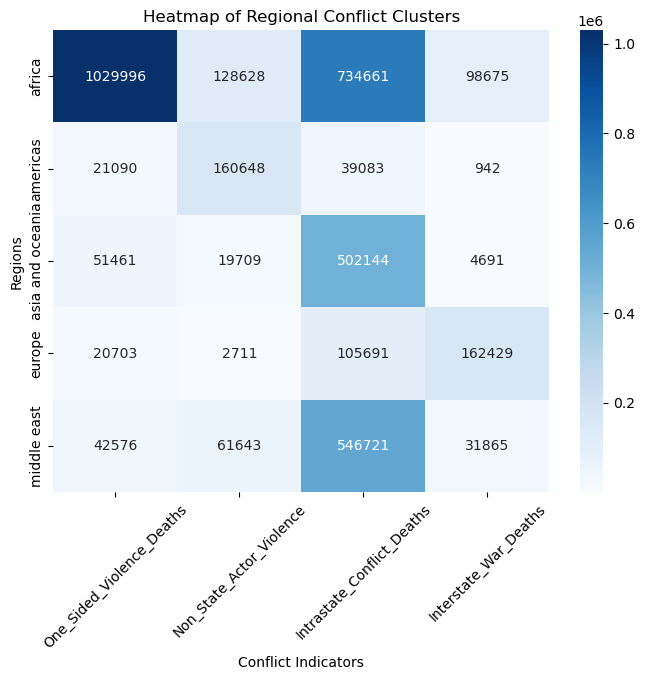

In [142]:
# Create a heatmap for cluster analysis
plt.figure(figsize=(8, 6))
sns.heatmap(clustering_data.drop(columns="Cluster"), annot=True, cmap="Blues", fmt=".0f")
plt.title("Heatmap of Regional Conflict Clusters")
plt.xlabel("Conflict Indicators")
plt.ylabel("Regions")
plt.xticks(rotation = 45)
plt.show()

# 📊 In-Depth Statistical Analysis of Numerical Data in Conflict Studies 📈
---

In [153]:
# Statistical summary for numerical columns
print("📊 Comprehensive Statistical Overview:")
statistics_summary = conflict_data[death_columns].describe().T
statistics_summary['Skewness'] = conflict_data[death_columns].skew()
statistics_summary['Kurtosis'] = conflict_data[death_columns].kurt()
statistics_summary

📊 Comprehensive Statistical Overview:


,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis
One_Sided_Violence_Deaths,175.0,6661.862857,58855.009394,0.0,201.5,783.0,2097.0,778178.0,13.097655,172.610065
Non_State_Actor_Violence,175.0,2133.365714,3689.590035,0.0,49.5,518.0,2983.0,19692.0,2.697053,7.575813
Intrastate_Conflict_Deaths,175.0,11018.857143,20984.547388,0.0,938.0,4673.0,11854.5,175197.0,4.755062,28.882474
Interstate_War_Deaths,175.0,1706.297143,10220.066392,0.0,0.0,0.0,12.5,91724.0,6.928560,50.500028


# 🧪 Testing for Normality in Conflict Data Using Shapiro-Wilk Test 📈
---

In [156]:
import scipy.stats as stats
# Conduct normality tests
print("🧪 Running Normality Tests:")
for column in death_columns:
    stat, p_value = stats.shapiro(conflict_data[column])
    normality_result = "Data is normally distributed." if p_value > 0.05 else "Data is not normally distributed."
    print(f"{column}: Shapiro-Wilk test p-value = {p_value:.4f}. {normality_result}")
    time.sleep(1)

🧪 Running Normality Tests:
One_Sided_Violence_Deaths: Shapiro-Wilk test p-value = 0.0000. Data is not normally distributed.
Non_State_Actor_Violence: Shapiro-Wilk test p-value = 0.0000. Data is not normally distributed.
Intrastate_Conflict_Deaths: Shapiro-Wilk test p-value = 0.0000. Data is not normally distributed.
Interstate_War_Deaths: Shapiro-Wilk test p-value = 0.0000. Data is not normally distributed.


# 🚨 Advanced Outlier Detection Using Z-Scores in Conflict Data Analysis 📉
---

In [127]:
z_scores = np.abs(stats.zscore(conflict_data[death_columns]))
z_threshold = 4  # Relaxed threshold
outlier_indices = np.where(z_scores > z_threshold)

print(f"🔍 Number of outliers detected with Z-score > {z_threshold}: {len(outlier_indices[0])}")

# Filter data to remove outliers only if the Z-score is greater than the threshold
cleaned_conflict_data = conflict_data[(z_scores < z_threshold).all(axis=1)]

# Verify the size of the cleaned dataset
if cleaned_conflict_data.empty:
    print("❌ All data points were removed. Adjusting the Z-score threshold...")
    cleaned_conflict_data = conflict_data  # Revert to original dataset if no data remains
else:
    print(f"✅ Outliers removed. Remaining rows: {cleaned_conflict_data.shape[0]}")

🔍 Number of outliers detected with Z-score > 4: 9
✅ Outliers removed. Remaining rows: 166
